<a href="https://colab.research.google.com/github/khusboobharadwaj/Prodigy_DataScience_Task4/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
## Import Libraries

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import NLTK modules if needed for future text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
## Load Dataset

In [35]:
# Specify the paths to your CSV files
train_path = '/content/drive/MyDrive/sentiment analysis dataset/twitter_training.csv'
test_path = '/content/drive/MyDrive/sentiment analysis dataset/twitter_validation.csv'

# Read the CSV files into pandas DataFrames
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


In [36]:
train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [37]:
test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [38]:
# Rename columns and drop unnecessary columns
train.columns = ['drop1', 'drop2', 'sentiment', 'content']
test.columns = ['drop1', 'drop2', 'sentiment', 'content']

train.drop(columns=['drop1', 'drop2'], inplace=True)
test.drop(columns=['drop1', 'drop2'], inplace=True)

In [39]:
# Display the first few rows of the modified DataFrames to verify
print("Train Data:")
print(train.head())



Train Data:
  sentiment                                            content
0  Positive  I am coming to the borders and I will kill you...
1  Positive  im getting on borderlands and i will kill you ...
2  Positive  im coming on borderlands and i will murder you...
3  Positive  im getting on borderlands 2 and i will murder ...
4  Positive  im getting into borderlands and i can murder y...


In [40]:
## Data Preparation

In [41]:
print(f'train shape :{train.shape} | test shape :{test.shape}')

train shape :(74681, 2) | test shape :(999, 2)


In [42]:
# If you intended to count sentiment values in the training set:
train['sentiment'].value_counts()



sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [43]:
# If you wanted to do it for the test set:
test['sentiment'].value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64

In [44]:
# Calculate percentage of missing values in train and test data
train_missing_percent = (train.isnull().sum() / train.shape[0]) * 100
test_missing_percent = (test.isnull().sum() / test.shape[0]) * 100

# Print percentage of missing values
print("Training Data %NAN:")
print(train_missing_percent)

print("\nTesting Data %NAN:")
print(test_missing_percent)




Training Data %NAN:
sentiment    0.000000
content      0.918574
dtype: float64

Testing Data %NAN:
sentiment    0.0
content      0.0
dtype: float64


In [45]:
train.dropna(inplace=True)
test.dropna(inplace=True)

org_train = train.copy()
org_test = test.copy()

In [46]:
## Data

In [47]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ' '.join(text.split())
    text = ' '.join([w for w in text.split() if len(w) > 1 or w in ['a', 'i']])
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [48]:
data = [train, test]
for df in data:
    df['content'] = df['content'].apply(clean_text)

In [49]:
## Implement WordNet Lemmatizer and Tokenizer

In [50]:
def lemmatize_and_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

    tokens = word_tokenize(lemmatized)

    return tokens

In [51]:
data = [train, test]

for df in data:
    df['content'] = df['content'].apply(lemmatize_and_tokenize)


In [52]:
train.head()

,sentiment,content
0,Positive,"[coming, border, kill]"
1,Positive,"[im, getting, borderland, kill]"
2,Positive,"[im, coming, borderland, murder]"
3,Positive,"[im, getting, borderland, murder]"
4,Positive,"[im, getting, borderland, murder]"


In [53]:
grouped_tokens = train.groupby('sentiment')['content'].sum()

In [54]:
word_freq = {sentiment: Counter(tokens) for sentiment, tokens in grouped_tokens.items()}

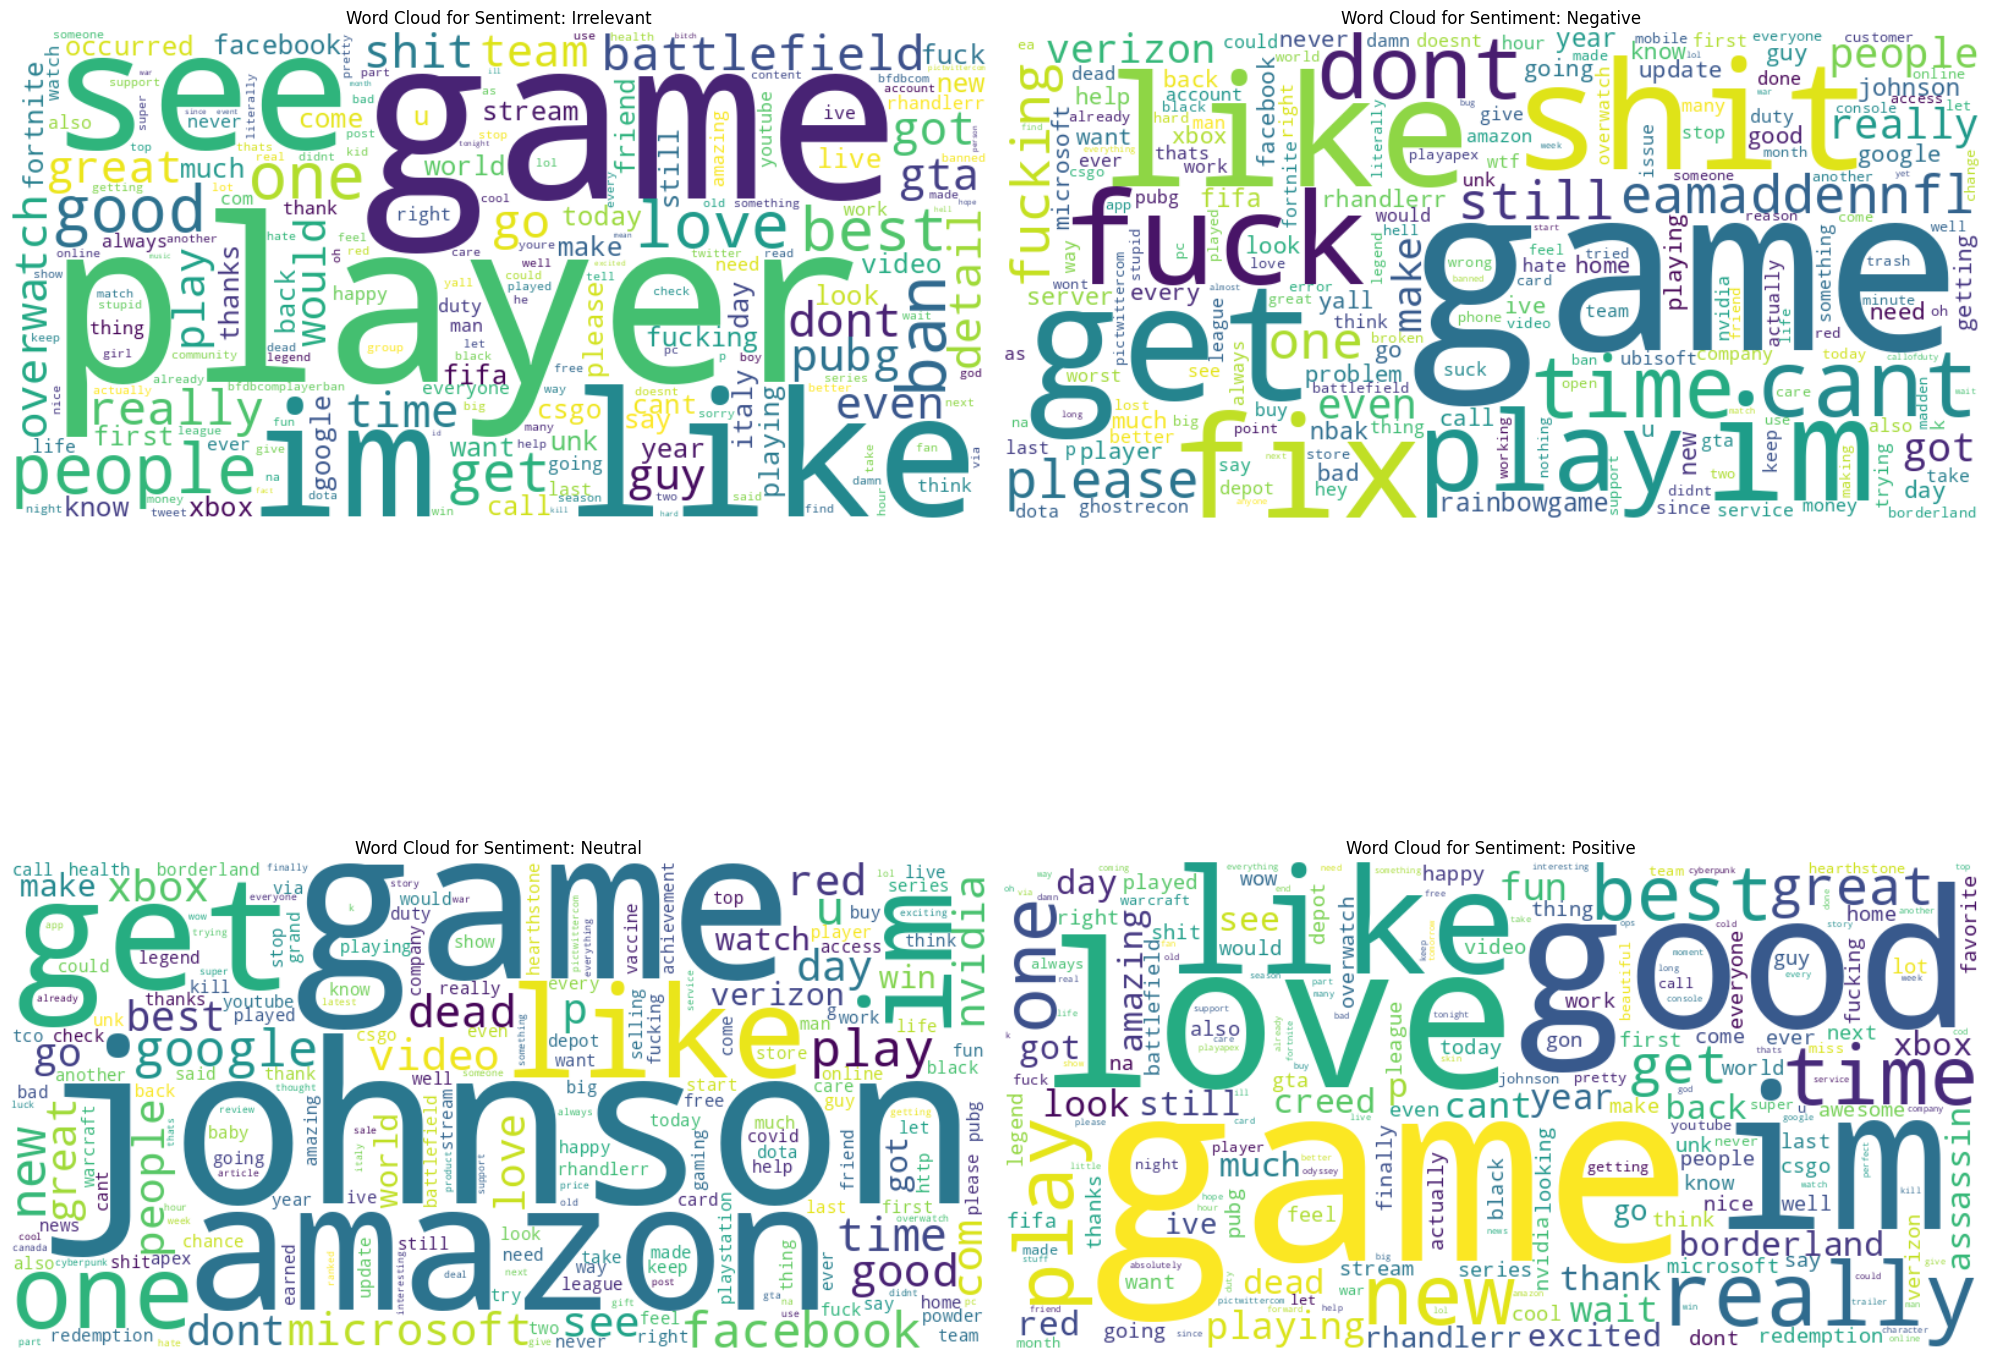

In [55]:
n_sentiments = len(word_freq)
cols = 2
rows = (n_sentiments + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 10 * rows))

for i, (sentiment, freq) in enumerate(word_freq.items()):
    ax = axes[i // cols, i % cols]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for Sentiment: {sentiment.capitalize()}')

for j in range(i + 1, rows * cols):
    axes[j // cols, j % cols].axis('off')

plt.tight_layout()
plt.show()

In [56]:
full_data = pd.concat([train, test])

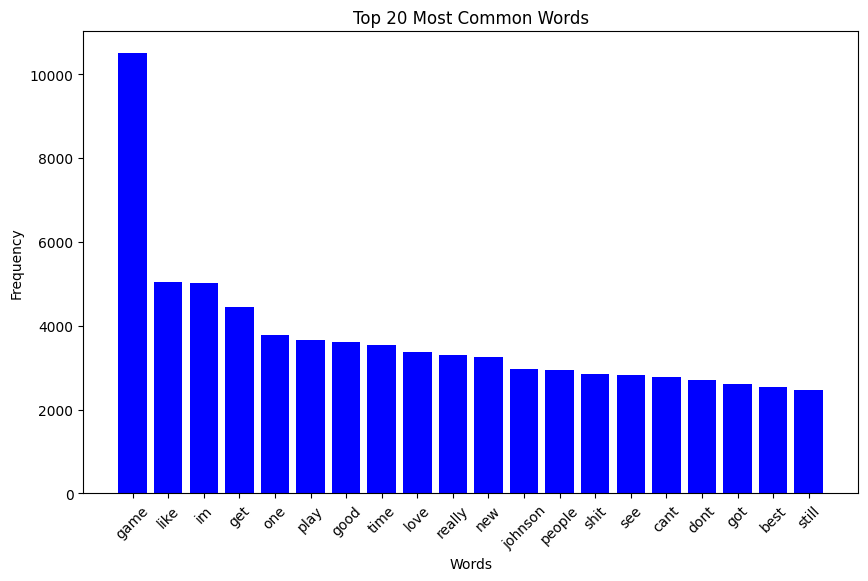

In [57]:
all_tokens = [token for sublist in full_data['content'] for token in sublist]
token_counts = Counter(all_tokens)

most_common_words = token_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [58]:
train['original_text'] = org_train['content']
test['original_text'] = org_test['content']

In [59]:
train['original_length'] = train['original_text'].apply(len)
train['cleaned_length'] = train['content'].apply(lambda x: len(' '.join(x)))

test['original_length'] = test['original_text'].apply(len)
test['cleaned_length'] = test['content'].apply(lambda x: len(' '.join(x)))

In [60]:
def jaccard_similarity_by_count(list1, list2):
    if not list1 and not list2:
        return 1
    if not list1 or not list2:
        return 0
    count1 = Counter(list1)
    count2 = Counter(list2)
    intersection = sum((count1 & count2).values())
    union = sum((count1 | count2).values())
    return intersection / union

In [61]:
train['jaccard_score'] = train.apply(lambda row: jaccard_similarity_by_count(row['original_text'].split(), row['content']), axis=1)
test['jaccard_score'] = test.apply(lambda row: jaccard_similarity_by_count(row['original_text'].split(), row['content']), axis=1)

In [62]:
train['jaccard_score'].describe()

count    73995.000000
mean         0.212883
std          0.151336
min          0.000000
25%          0.111111
50%          0.206897
75%          0.297297
max          1.000000
Name: jaccard_score, dtype: float64

In [63]:
zero_jaccard_df = train[train['jaccard_score'] == 0]
zero_jaccard_df.head()

,sentiment,content,original_text,original_length,cleaned_length,jaccard_score
10,Positive,[],was,3,0,0.0
11,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",94,79,0.0
12,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",94,80,0.0
13,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",93,79,0.0
14,Neutral,"[rockhard, la, vita, rare, powerful, handsome,...","Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",91,76,0.0


In [64]:
train_filtered = train[train['sentiment'].isin(['Positive', 'Negative'])]
test_filtered = test[test['sentiment'].isin(['Positive', 'Negative'])]

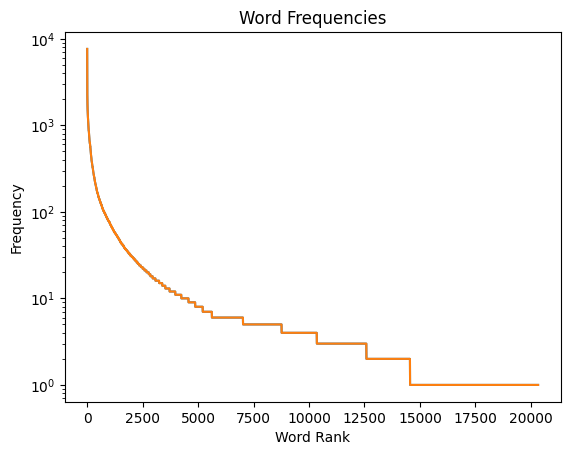

In [65]:
all_tokens = [token for sublist in train_filtered['content'] for token in sublist]
word_freq = Counter(all_tokens)

frequencies = list(word_freq.values())
frequencies.sort(reverse=True)

plt.plot(frequencies)
all_tokens = [token for sublist in train_filtered['content'] for token in sublist]
word_freq = Counter(all_tokens)

frequencies = list(word_freq.values())
frequencies.sort(reverse=True)

plt.plot(frequencies)
plt.title('Word Frequencies')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()
